# Importing Data & Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

players_df = pd.read_csv("C:/Users/ricca/Desktop/FootballData/players.csv")
val_df = pd.read_csv("C:/Users/ricca/Desktop/FootballData/player_valuations.csv")

# Data Preparation of Players

In [2]:
players_df.shape

(30302, 23)

In [3]:
players_df.head(10)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,...,NaN,NaN,NaN,10000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,...,NaN,NaN,NaN,12000000.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,...,NaN,NaN,NaN,2750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,...,right,173.0,NaN,10500000.0,NaN,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,...,left,177.0,NaN,17000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC
5,3614,Tony,Hibbert,Tony Hibbert,2015,29,tony-hibbert,England,Liverpool,England,...,right,173.0,NaN,4500000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tony-hibbert/p...,GB1,Everton FC
6,3804,Carlo,Nash,Carlo Nash,2013,1123,carlo-nash,England,Bolton,England,...,right,197.0,NaN,800000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/carlo-nash/pro...,GB1,Norwich City
7,4042,Brad,Jones,Brad Jones,2017,234,brad-jones,Australia,Armadale,Australia,...,left,194.0,100000.0,2000000.0,2023-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/brad-jones/pro...,NL1,Feyenoord Rotterdam
8,4112,Rory,Delap,Rory Delap,2012,512,rory-delap,England,Sutton Coldfield,Ireland,...,right,183.0,NaN,5500000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/rory-delap/pro...,GB1,Stoke City
9,4133,Richie,Ryan,Richie Ryan,2012,1519,richie-ryan,Ireland,Tipperary,Ireland,...,both,178.0,NaN,350000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/richie-ryan/pr...,SC1,Dundee United FC


In [4]:
players_df = players_df.set_index('player_id')

In [5]:
# renaming columns
players_df = players_df.rename(columns={
    'name':'full_name',
    'last_season':'last_played_season',
    'current_club_id':'club_id',
    'country_of_citizenship':'nationality',
    'current_club_domestic_competition_id':'league_id',
    'current_club_name':'club_name',
    'url':'player_profile_url'
})

players_df

,first_name,last_name,full_name,last_played_season,club_id,player_code,country_of_birth,city_of_birth,nationality,date_of_birth,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,player_profile_url,league_id,club_name
player_id,,,,,,,,,,,,,,,,,,,,,
598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,1979-04-05,...,NaN,NaN,NaN,10000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt
670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,1979-01-15,...,NaN,NaN,NaN,12000000.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona
1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,1982-09-06,...,NaN,NaN,NaN,2750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt
3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,1983-01-15,...,right,173.0,NaN,10500000.0,NaN,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City
3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,1979-03-02,...,left,177.0,NaN,17000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,1999-02-05,...,right,190.0,10000000.0,10000000.0,2027-06-30 00:00:00,MSC GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio
537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,Italy,2001-09-01,...,right,188.0,325000.0,350000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/semuel-pizzign...,IT1,Udinese Calcio
586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,...,right,180.0,4500000.0,4500000.0,2027-06-30 00:00:00,The Kulture Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio


In [6]:
# handling NA values
players_df.isna().sum()

first_name                      1965
last_name                          0
full_name                          0
last_played_season                 0
club_id                            0
player_code                        0
country_of_birth                2689
city_of_birth                   2203
nationality                      543
date_of_birth                     47
sub_position                     172
position                           0
foot                            2389
height_in_cm                    2098
market_value_in_eur            10919
highest_market_value_in_eur     1321
contract_expiration_date       11467
agent_name                     15361
image_url                          0
player_profile_url                 0
league_id                          0
club_name                          0
dtype: int64

In [7]:
# removing NA rows for date_of_birth
players_df = players_df.loc[~players_df['date_of_birth'].isna()]

# setting NA heights to a medium height value
players_df.loc[players_df['height_in_cm'].isna(), 'height_in_cm'] = players_df['height_in_cm'].mean()

# setting NA market values to 0
players_df.loc[players_df['market_value_in_eur'].isna(), 'market_value_in_eur'] = 0
players_df.loc[players_df['highest_market_value_in_eur'].isna(), 'highest_market_value_in_eur'] = 0


players_df.isna().sum()

first_name                      1965
last_name                          0
full_name                          0
last_played_season                 0
club_id                            0
player_code                        0
country_of_birth                2673
city_of_birth                   2187
nationality                      542
date_of_birth                      0
sub_position                     167
position                           0
foot                            2375
height_in_cm                       0
market_value_in_eur                0
highest_market_value_in_eur        0
contract_expiration_date       11430
agent_name                     15321
image_url                          0
player_profile_url                 0
league_id                          0
club_name                          0
dtype: int64

In [8]:
# searching duplicates
players_df.loc[players_df.duplicated()]

,first_name,last_name,full_name,last_played_season,club_id,player_code,country_of_birth,city_of_birth,nationality,date_of_birth,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,player_profile_url,league_id,club_name
player_id,,,,,,,,,,,,,,,,,,,,,


In [9]:
players_df.dtypes

first_name                      object
last_name                       object
full_name                       object
last_played_season               int64
club_id                          int64
player_code                     object
country_of_birth                object
city_of_birth                   object
nationality                     object
date_of_birth                   object
sub_position                    object
position                        object
foot                            object
height_in_cm                   float64
market_value_in_eur            float64
highest_market_value_in_eur    float64
contract_expiration_date        object
agent_name                      object
image_url                       object
player_profile_url              object
league_id                       object
club_name                       object
dtype: object

In [10]:
# converting data types
players_df['height_in_cm'] = players_df['height_in_cm'].astype('int64')

players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
players_df['contract_expiration_date'] = pd.to_datetime(players_df['contract_expiration_date'])

players_df.dtypes

C:\Users\ricca\AppData\Local\Temp\ipykernel_22400\1119932191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_df['height_in_cm'] = players_df['height_in_cm'].astype('int64')
C:\Users\ricca\AppData\Local\Temp\ipykernel_22400\1119932191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
C:\Users\ricca\AppData\Local\Temp\ipykernel_22400\1119932191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

first_name                             object
last_name                              object
full_name                              object
last_played_season                      int64
club_id                                 int64
player_code                            object
country_of_birth                       object
city_of_birth                          object
nationality                            object
date_of_birth                  datetime64[ns]
sub_position                           object
position                               object
foot                                   object
height_in_cm                            int64
market_value_in_eur                   float64
highest_market_value_in_eur           float64
contract_expiration_date       datetime64[ns]
agent_name                             object
image_url                              object
player_profile_url                     object
league_id                              object
club_name                         

In [11]:
# adding columns to the dataframe
players_df['height_in_m'] = players_df['height_in_cm']/100

players_df['market_value_mln'] = players_df['market_value_in_eur']/1e6
players_df['highest_market_value_mln'] = players_df['highest_market_value_in_eur']/1e6

# age column
from datetime import datetime
time_difference = (datetime.now() - pd.to_datetime(players_df['date_of_birth']))
players_df["age"] = (time_difference.dt.days // 365)


players_df

C:\Users\ricca\AppData\Local\Temp\ipykernel_22400\838659456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_df['height_in_m'] = players_df['height_in_cm']/100
C:\Users\ricca\AppData\Local\Temp\ipykernel_22400\838659456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_df['market_value_mln'] = players_df['market_value_in_eur']/1e6
C:\Users\ricca\AppData\Local\Temp\ipykernel_22400\838659456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,first_name,last_name,full_name,last_played_season,club_id,player_code,country_of_birth,city_of_birth,nationality,date_of_birth,...,contract_expiration_date,agent_name,image_url,player_profile_url,league_id,club_name,height_in_m,market_value_mln,highest_market_value_mln,age
player_id,,,,,,,,,,,,,,,,,,,,,
598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,1979-04-05,...,NaT,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt,1.82,0.000,10.000,45
670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,1979-01-15,...,NaT,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona,1.82,0.000,12.000,45
1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,1982-09-06,...,NaT,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt,1.82,0.000,2.750,41
3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,1983-01-15,...,NaT,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City,1.73,0.000,10.500,41
3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,1979-03-02,...,NaT,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC,1.77,0.000,17.000,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,1999-02-05,...,2027-06-30,MSC GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio,1.90,10.000,10.000,25
537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,Italy,2001-09-01,...,2025-06-30,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/semuel-pizzign...,IT1,Udinese Calcio,1.88,0.325,0.350,22
586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,...,2027-06-30,The Kulture Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio,1.80,4.500,4.500,21


# Data Preparation of Players Valuations

In [12]:
val_df.shape

(440663, 9)

In [13]:
val_df.head(10)

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,3132,2013,2003-12-09 00:00:00,2003-12-09,2003-12-08,400000,1,126,TR1
1,6893,2012,2003-12-15 00:00:00,2003-12-15,2003-12-15,900000,1,984,GB1
2,10,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,7000000,1,398,IT1
3,26,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,1500000,1,16,L1
4,65,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,8000000,1,1091,GR1
5,77,2012,2004-10-04 00:00:00,2004-10-04,2004-10-04,13000000,1,506,IT1
6,80,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,400000,1,27,L1
7,109,2012,2004-10-04 00:00:00,2004-10-04,2004-10-04,9500000,1,825,TR1
8,123,2012,2004-10-04 00:00:00,2004-10-04,2004-10-04,9500000,1,33,L1
9,132,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,13000000,1,11,GB1


In [14]:
val_df.columns

Index(['player_id', 'last_season', 'datetime', 'date', 'dateweek',
       'market_value_in_eur', 'n', 'current_club_id',
       'player_club_domestic_competition_id'],
      dtype='object')

In [15]:
# renaming columns
val_df = val_df.rename(columns={
    'current_club_id': 'club_id',
    'player_club_domestic_competition_id': 'league_id',
})

val_df

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,club_id,league_id
0,3132,2013,2003-12-09 00:00:00,2003-12-09,2003-12-08,400000,1,126,TR1
1,6893,2012,2003-12-15 00:00:00,2003-12-15,2003-12-15,900000,1,984,GB1
2,10,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,7000000,1,398,IT1
3,26,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,1500000,1,16,L1
4,65,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,8000000,1,1091,GR1
...,...,...,...,...,...,...,...,...,...
440658,950091,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,1000000,1,1091,GR1
440659,968903,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,653,GR1
440660,1031590,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,6418,GR1
440661,1166093,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,30120,GR1


In [16]:
# checking NA values
val_df.isna().sum()

player_id              0
last_season            0
datetime               0
date                   0
dateweek               0
market_value_in_eur    0
n                      0
club_id                0
league_id              0
dtype: int64

In [17]:
# checking duplicates
val_df.loc[val_df.duplicated()]

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,club_id,league_id


In [18]:
val_df.dtypes

player_id               int64
last_season             int64
datetime               object
date                   object
dateweek               object
market_value_in_eur     int64
n                       int64
club_id                 int64
league_id              object
dtype: object

In [19]:
# converting data types and adding columns

val_df['market_value_mln'] = val_df['market_value_in_eur'] / 1e6

val_df['datetime'] = pd.to_datetime(val_df['datetime'])

val_df.dtypes

player_id                       int64
last_season                     int64
datetime               datetime64[ns]
date                           object
dateweek                       object
market_value_in_eur             int64
n                               int64
club_id                         int64
league_id                      object
market_value_mln              float64
dtype: object

In [20]:
val_df = val_df[[
    'player_id',
    'last_season',
    'datetime', 
    'date',
    #'dateweek',
    'market_value_in_eur',
    'market_value_mln',
    #'n', 
    'club_id',
    'league_id'
]]

val_df

,player_id,last_season,datetime,date,market_value_in_eur,market_value_mln,club_id,league_id
0,3132,2013,2003-12-09,2003-12-09,400000,0.40,126,TR1
1,6893,2012,2003-12-15,2003-12-15,900000,0.90,984,GB1
2,10,2015,2004-10-04,2004-10-04,7000000,7.00,398,IT1
3,26,2017,2004-10-04,2004-10-04,1500000,1.50,16,L1
4,65,2015,2004-10-04,2004-10-04,8000000,8.00,1091,GR1
...,...,...,...,...,...,...,...,...
440658,950091,2023,2023-09-21,2023-09-21,1000000,1.00,1091,GR1
440659,968903,2023,2023-09-21,2023-09-21,50000,0.05,653,GR1
440660,1031590,2023,2023-09-21,2023-09-21,50000,0.05,6418,GR1
440661,1166093,2023,2023-09-21,2023-09-21,50000,0.05,30120,GR1


# Data Analysis & Visualization

In [21]:
#making a dataframe subset and reordering columns

players_df = players_df [[
    #'player_code',
    #'first_name',
    #'last_name', 
    'full_name',
    #'club_id',
    'club_name',
    'league_id',
    'country_of_birth', 
    #'city_of_birth',
    'nationality',
    'position',
    'sub_position',
    #'market_value_in_eur',
    #'highest_market_value_in_eur',
    'market_value_mln',
    'highest_market_value_mln',
    'date_of_birth',
    'age',
    'foot',
    #'height_in_cm',
    'height_in_m',
    'last_played_season'
    #'contract_expiration_date', 
    #'agent_name', 
    #'image_url',
    #'player_profile_url', 
]]

players_df.sort_values("market_value_mln", ascending = False)

,full_name,club_name,league_id,country_of_birth,nationality,position,sub_position,market_value_mln,highest_market_value_mln,date_of_birth,age,foot,height_in_m,last_played_season
player_id,,,,,,,,,,,,,,
342229,Kylian Mbappé,Paris Saint-Germain,FR1,France,France,Attack,Centre-Forward,180.0,200.00,1998-12-20,25,right,1.78,2023
418560,Erling Haaland,Manchester City,GB1,England,Norway,Attack,Centre-Forward,180.0,180.00,2000-07-21,23,left,1.95,2023
581678,Jude Bellingham,Real Madrid,ES1,England,England,Midfield,Central Midfield,150.0,150.00,2003-06-29,20,right,1.86,2023
371998,Vinicius Junior,Real Madrid,ES1,Brazil,Brazil,Attack,Left Winger,150.0,150.00,2000-07-12,23,right,1.76,2023
433177,Bukayo Saka,Arsenal FC,GB1,England,England,Attack,Right Winger,120.0,120.00,2001-09-05,22,left,1.78,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315185,Jake Hesketh,Southampton FC,GB1,England,England,Midfield,Attacking Midfield,0.0,0.20,1996-03-27,28,right,1.68,2020
67371,Rory Boulding,Dundee United FC,SC1,England,England,Attack,Centre-Forward,0.0,0.25,1988-07-21,35,NaN,1.85,2012
67355,Ashley Williams,Everton FC,GB1,England,Wales,Defender,Centre-Back,0.0,8.50,1984-08-23,39,right,1.83,2018


In [22]:
# checking variable height
players_df['height_in_m'].describe()

count    30255.000000
mean         1.822181
std          0.065951
min          0.180000
25%          1.780000
50%          1.820000
75%          1.870000
max          2.070000
Name: height_in_m, dtype: float64

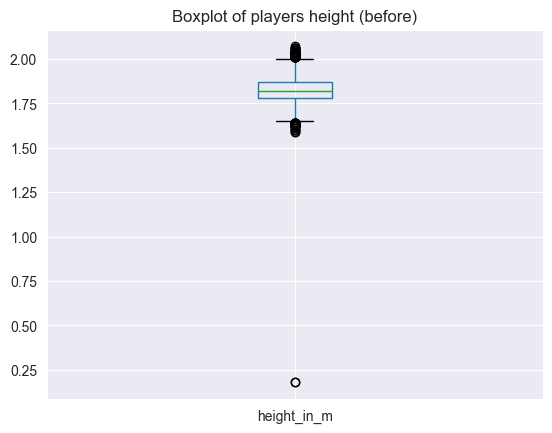

In [23]:
# check for height outliers
ax = players_df.boxplot(column='height_in_m')
ax.set_title('Boxplot of players height (before)')
plt.show()

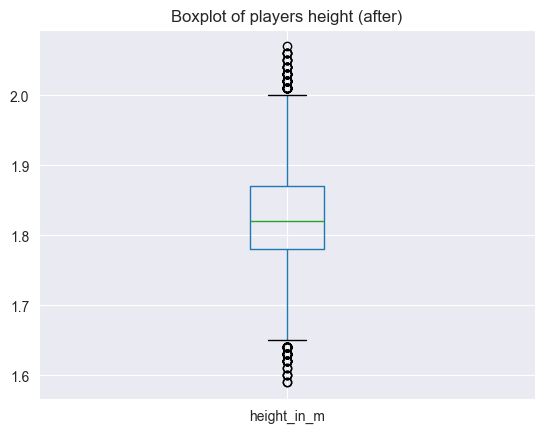

In [24]:
# remove height outliers
players_df = players_df.loc[players_df['height_in_m']>1]

# boxplot after
ax = players_df.boxplot(column='height_in_m')
ax.set_title('Boxplot of players height (after)')
plt.show()

In [25]:
players_df['market_value_mln'].describe()

count    30253.000000
mean         1.431766
std          5.972723
min          0.000000
25%          0.000000
50%          0.150000
75%          0.500000
max        180.000000
Name: market_value_mln, dtype: float64

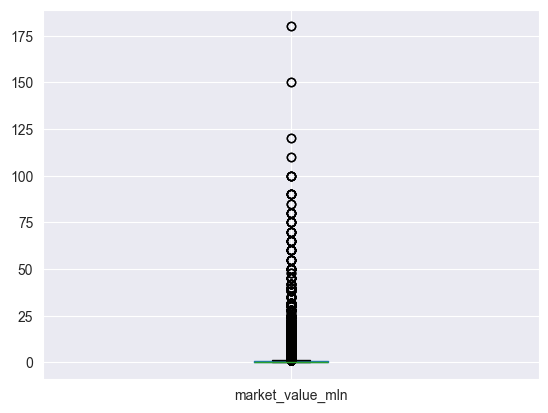

In [26]:
ax = players_df.boxplot(column='market_value_mln')
plt.show()

In [27]:
players_df.query('market_value_mln < 0.1 and last_played_season == 2023')

,full_name,club_name,league_id,country_of_birth,nationality,position,sub_position,market_value_mln,highest_market_value_mln,date_of_birth,age,foot,height_in_m,last_played_season
player_id,,,,,,,,,,,,,,
511119,Halil Yeral,Samsunspor,TR1,Turkey,Turkey,Goalkeeper,Goalkeeper,0.050,0.075,2000-01-01,24,right,1.90,2023
624151,Giannis Saltas,Atromitos Athens,GR1,NaN,Greece,Goalkeeper,Goalkeeper,0.050,0.050,2002-03-05,22,NaN,1.82,2023
662140,Eray Özbek,Kayserispor,TR1,Turkey,Turkey,Midfield,Attacking Midfield,0.050,0.050,2003-01-09,21,left,1.82,2023
702856,Joey Antonioli,FC Volendam,NL1,Netherlands,Netherlands,Midfield,Central Midfield,0.075,0.075,2003-12-15,20,NaN,1.82,2023
707777,David Mindombe,Sint-Truidense VV,BE1,NaN,Belgium,Defender,Centre-Back,0.025,0.025,2001-06-19,22,right,1.83,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111166,Johannes Selvén,Odense Boldklub,DK1,Sweden,Sweden,Attack,Right Winger,0.025,0.025,2003-07-26,20,right,1.75,2023
988532,Danil Anosov,FC Sochi,RU1,Russia,Russia,Midfield,Left Midfield,0.050,0.050,2005-02-26,19,right,1.76,2023
1047622,Kağan Arıcan,Antalyaspor,TR1,Turkey,Turkey,Goalkeeper,Goalkeeper,0.050,0.050,2006-03-10,18,right,1.87,2023


In [28]:
current_players = players_df.query('last_played_season == 2023')

Mean of market_value_mln: 5.30
Mean of highest_market_value_mln: 8.48
Mean of age: 26.01
Mean of height_in_m: 1.83


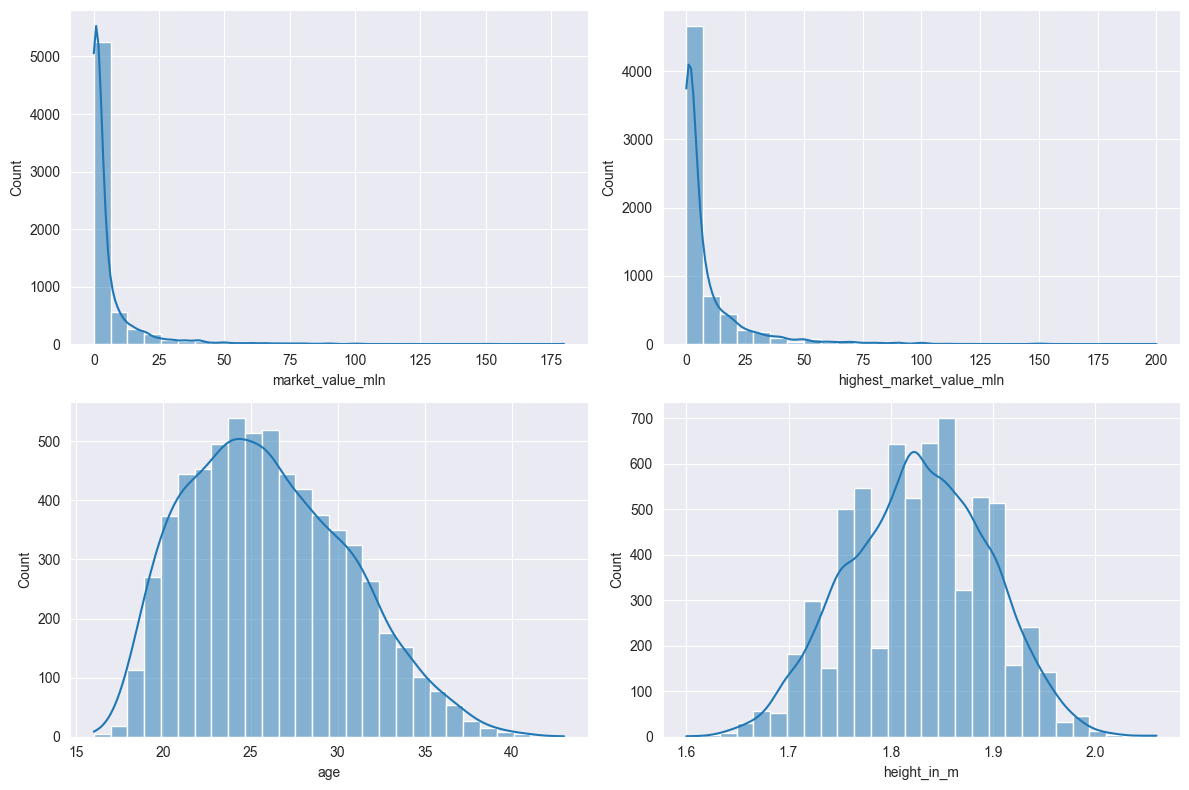

In [29]:
# univariate analysis

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

variables = ["market_value_mln", "highest_market_value_mln", "age", "height_in_m"]

for ax, variable in zip(axs.flatten(), variables):
    sns.histplot(data=current_players, x=variable, kde=True, ax=ax, bins=28)
    mean_value = current_players[variable].mean()
    print(f"Mean of {variable}: {mean_value:.2f}")


plt.tight_layout()
plt.show()

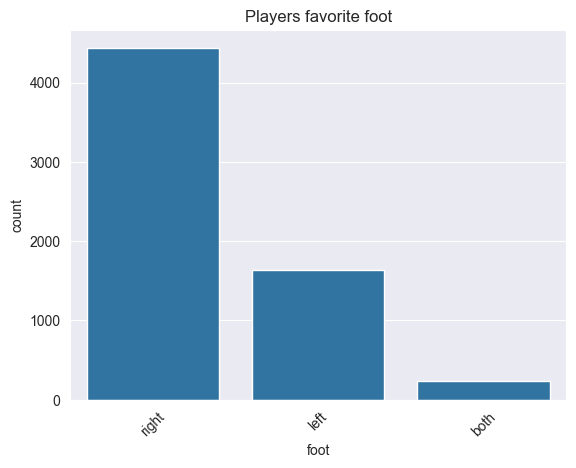

In [30]:
sns.countplot(data=current_players, x='foot')
plt.title("Players favorite foot")
plt.xticks(rotation=45)
plt.show()

In [31]:
# multivariate analysis
current_players[['market_value_mln','highest_market_value_mln']].corr()

,market_value_mln,highest_market_value_mln
market_value_mln,1.000000,0.852867
highest_market_value_mln,0.852867,1.000000


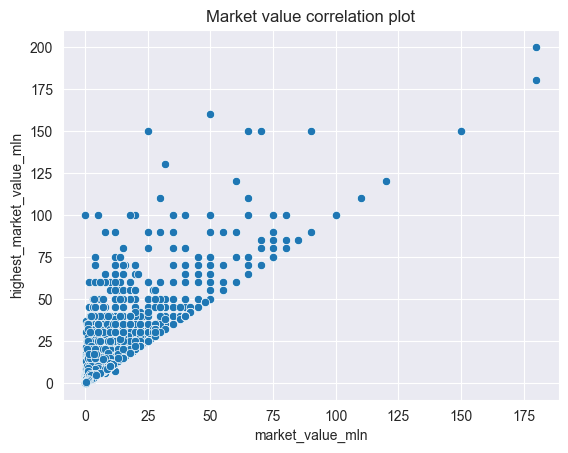

In [32]:
sns.scatterplot(data=current_players, x='market_value_mln', y='highest_market_value_mln')
plt.title("Market value correlation plot")
plt.show()

In [33]:
current_players['nationality'].describe()

count      6538
unique      134
top       Spain
freq        425
Name: nationality, dtype: object

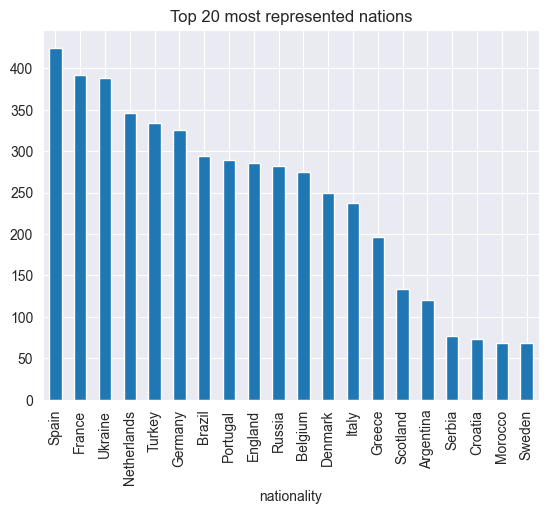

In [34]:
current_players['nationality'].value_counts().head(20).plot(kind='bar', title='Top 20 most represented nations')
plt.show()

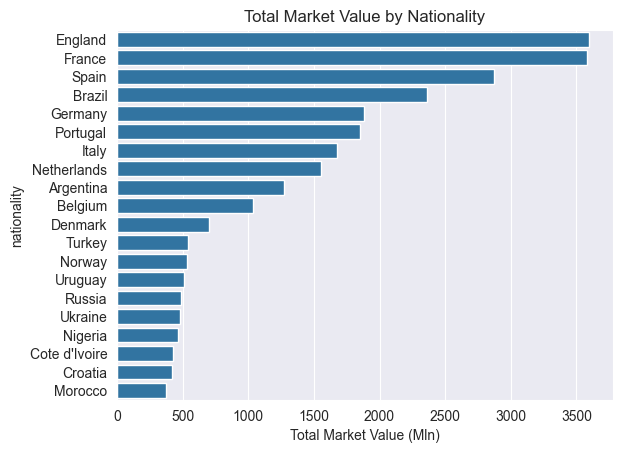

In [35]:
# totale vdm per nazionalità

market_value_by_nationality = current_players.groupby('nationality')['market_value_mln'].sum().reset_index()
market_value_by_nationality = market_value_by_nationality.sort_values(by='market_value_mln', ascending=False).head(20)

sns.barplot(data=market_value_by_nationality, y='nationality', x='market_value_mln')

plt.title('Total Market Value by Nationality')
plt.xlabel('Total Market Value (Mln)')
plt.show()


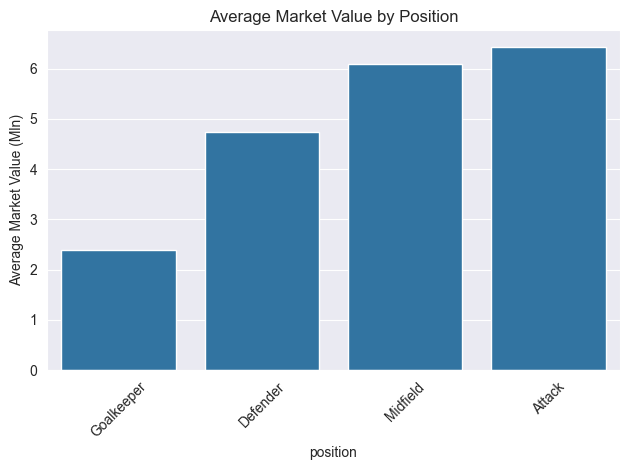

In [36]:
# VDM medio per posizione
positions_order = ['Goalkeeper', 'Defender', 'Midfield', 'Attack']

avg_vdm_by_position = current_players.groupby('position')['market_value_mln'].mean().reset_index()
avg_vdm_by_position = avg_vdm_by_position[avg_vdm_by_position['position'].isin(positions_order)]

sns.barplot(data=avg_vdm_by_position, x='position', y='market_value_mln', order=positions_order)

plt.title('Average Market Value by Position')
plt.ylabel('Average Market Value (Mln)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

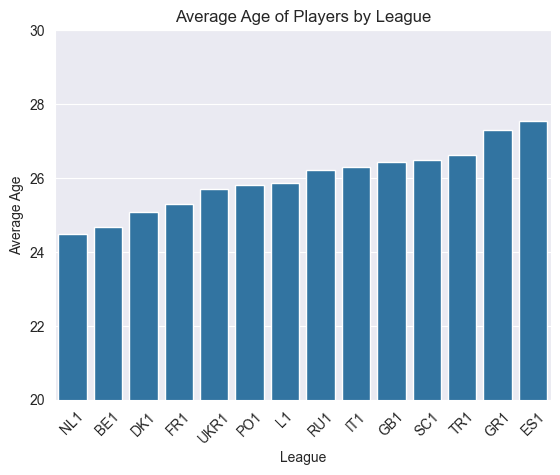

In [37]:
# età media dei calciatori di ogni campionato
avg_age_by_league = current_players.groupby('league_id')['age'].mean().reset_index().sort_values(by='age')

sns.barplot(data=avg_age_by_league, x='league_id', y='age')

plt.ylim(20,30)
plt.title('Average Age of Players by League')
plt.xlabel('League')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

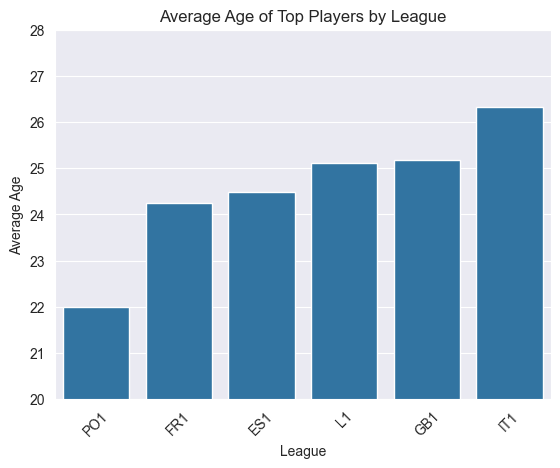

In [38]:
# età media dei calciatori, ma considerando solo i top-player
top_players = current_players.query('market_value_mln >= 40')

avg_age_by_league = top_players.groupby('league_id')['age'].mean().reset_index().sort_values(by='age')

sns.barplot(data=avg_age_by_league, x='league_id', y='age')

plt.ylim(20,28)
plt.title('Average Age of Top Players by League')
plt.xlabel('League')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

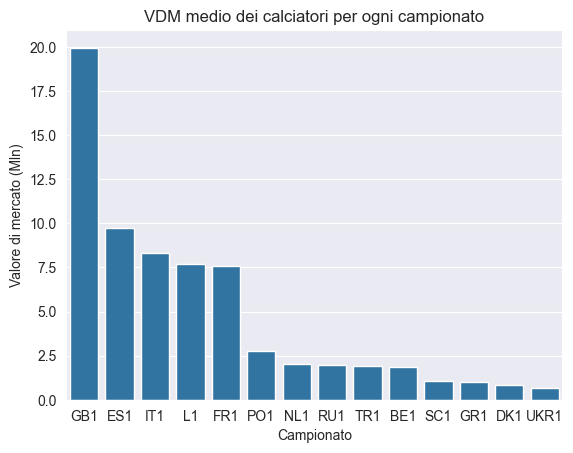

In [39]:
# average players market value for every league
avg_market_value = current_players.groupby('league_id')['market_value_mln'].mean().reset_index()
avg_market_value = avg_market_value.sort_values(by='market_value_mln', ascending=False)

sns.barplot(data=avg_market_value, x='league_id', y='market_value_mln')
plt.title('VDM medio dei calciatori per ogni campionato')
plt.xlabel('Campionato')
plt.ylabel('Valore di mercato (Mln)')
plt.show()

In [40]:
# TOP 11 lineup
ordered_df = current_players.sort_values("market_value_mln", ascending=False)

goalkeeper = ordered_df.query('position == "Goalkeeper"').head(1)
defenders = ordered_df.query('position == "Defender"').head(4)
midfielders = ordered_df.query('position == "Midfield"').head(3)
attackers = ordered_df.query('position == "Attack"').head(3)

top_11_lineup = pd.concat([goalkeeper, defenders, midfielders, attackers])

top_11_lineup[['full_name', 'club_name', 'nationality', 'position', 'market_value_mln']]

,full_name,club_name,nationality,position,market_value_mln
player_id,,,,,
108390,Thibaut Courtois,Real Madrid,Belgium,Goalkeeper,45.0
258004,Rúben Dias,Manchester City,Portugal,Defender,80.0
475959,Josko Gvardiol,Manchester City,Croatia,Defender,80.0
326031,Matthijs de Ligt,Bayern Munich,Netherlands,Defender,75.0
480267,Ronald Araújo,FC Barcelona,Uruguay,Defender,70.0
581678,Jude Bellingham,Real Madrid,England,Midfield,150.0
580195,Jamal Musiala,Bayern Munich,Germany,Midfield,110.0
683840,Pedri,FC Barcelona,Spain,Midfield,100.0
418560,Erling Haaland,Manchester City,Norway,Attack,180.0


In [41]:
# TOP 11 lineup for every league

league = "IT1"

one_league_df = current_players[current_players['league_id'] == league].sort_values("market_value_mln", ascending=False)

goalkeeper = one_league_df.query('position == "Goalkeeper"').head(1)
defenders = one_league_df.query('position == "Defender"').head(4)
midfielders = one_league_df.query('position == "Midfield"').head(3)
attackers = one_league_df.query('position == "Attack"').head(3)

top_11_league_lineup = pd.concat([goalkeeper, defenders, midfielders, attackers])

top_11_league_lineup[['full_name', 'club_name', 'nationality', 'position', 'market_value_mln']]

,full_name,club_name,nationality,position,market_value_mln
player_id,,,,,
182906,Mike Maignan,AC Milan,France,Goalkeeper,45.0
339808,Theo Hernández,AC Milan,France,Defender,60.0
315853,Alessandro Bastoni,Inter Milan,Italy,Defender,60.0
198116,Federico Dimarco,Inter Milan,Italy,Defender,45.0
353366,Benjamin Pavard,Inter Milan,France,Defender,40.0
255942,Nicolò Barella,Inter Milan,Italy,Midfield,75.0
192735,Stanislav Lobotka,SSC Napoli,Slovakia,Midfield,40.0
354361,Frank Anguissa,SSC Napoli,Cameroon,Midfield,40.0
401923,Victor Osimhen,SSC Napoli,Nigeria,Attack,120.0


In [42]:
# TOP 11 lineup of under 21 y/o players

u21_df = current_players.query('age <= 21').sort_values("market_value_mln", ascending=False)

goalkeeper = u21_df.query('position == "Goalkeeper"').head(1)
defenders = u21_df.query('position == "Defender"').head(4)
midfielders = u21_df.query('position == "Midfield"').head(3)
attackers = u21_df.query('position == "Attack"').head(3)

top_11_u21_lineup = pd.concat([goalkeeper, defenders, midfielders, attackers])

top_11_u21_lineup[['full_name', 'club_name', 'nationality', 'position', 'market_value_mln']]

,full_name,club_name,nationality,position,market_value_mln
player_id,,,,,
565093,Bart Verbruggen,Brighton & Hove Albion,Netherlands,Goalkeeper,15.0
616341,Nuno Mendes,Paris Saint-Germain,Portugal,Defender,65.0
636688,Alejandro Balde,FC Barcelona,Spain,Defender,50.0
650568,António Silva,SL Benfica,Portugal,Defender,45.0
614258,Levi Colwill,Chelsea FC,England,Defender,42.0
581678,Jude Bellingham,Real Madrid,England,Midfield,150.0
580195,Jamal Musiala,Bayern Munich,Germany,Midfield,110.0
683840,Pedri,FC Barcelona,Spain,Midfield,100.0
648046,Evan Ferguson,Brighton & Hove Albion,Ireland,Attack,65.0


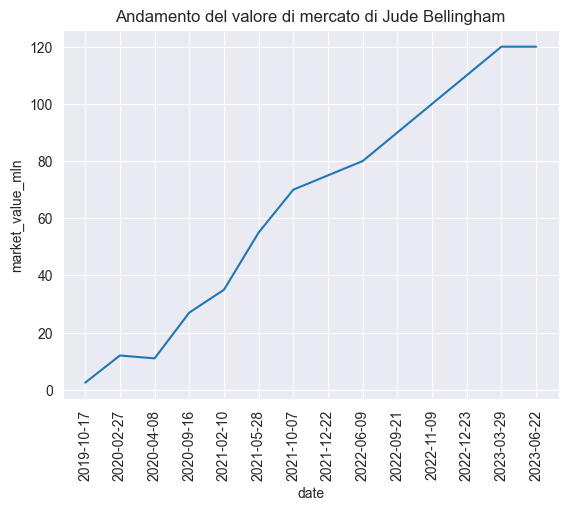

In [43]:
# andamento del VDM di un singolo giocatore

selected_player = current_players.query('full_name == "Jude Bellingham"')
player_id = selected_player.index[0]

market_value_evolution = val_df.query(f'player_id == {player_id}')

sns.lineplot(data=market_value_evolution, x='date', y='market_value_mln')
plt.xticks(rotation=90)
plt.title("Andamento del valore di mercato di Jude Bellingham")
plt.show()

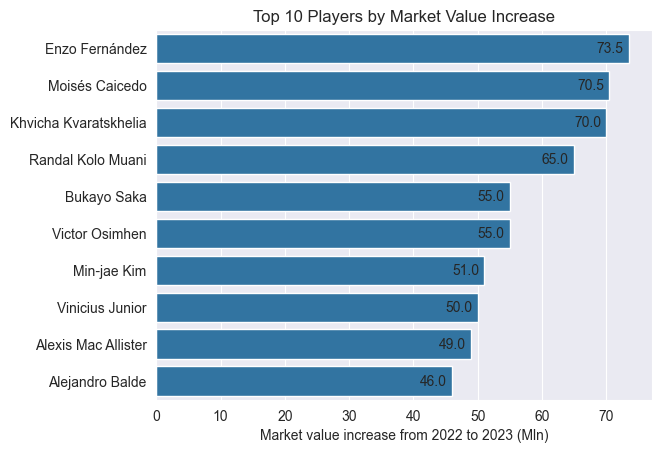

In [44]:
# most increased market value of players (from 2022 to 2023)

val_df_22_23 = val_df.query('datetime >= 2022 and last_season == 2023').sort_values(by='datetime')

diff = val_df_22_23.groupby('player_id')['market_value_mln'].last() - \
       val_df_22_23.groupby('player_id')['market_value_mln'].first()

diff = diff.sort_values(ascending=False).head(10)

names = current_players.loc[diff.index]['full_name']

top10_df = pd.DataFrame({'Player': names.values, 'Market Value Difference (Mln)': diff.values})

ax = sns.barplot(data=top10_df, x='Market Value Difference (Mln)', y='Player')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}', ((p.get_width() - 5), p.get_y() + p.get_height() / 2), ha='left', va='center')
    
plt.xlabel('Market value increase from 2022 to 2023 (Mln)')
plt.ylabel('')
plt.title('Top 10 Players by Market Value Increase')
plt.show()

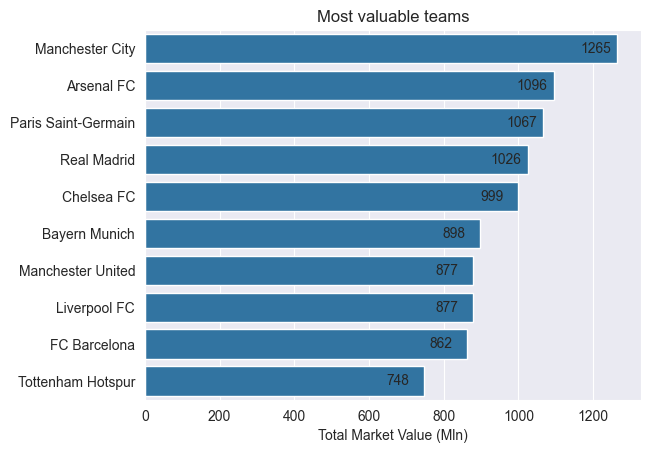

In [45]:
# most valuable teams

teams_market_value = current_players.groupby('club_name')['market_value_mln'].sum().reset_index()
top10_teams = teams_market_value.sort_values(by='market_value_mln', ascending=False).head(10)

ax = sns.barplot(data=top10_teams, x='market_value_mln', y='club_name')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', ((p.get_width() - 100), p.get_y() + p.get_height() / 2), ha='left', va='center')
    
plt.xlabel('Total Market Value (Mln)')
plt.ylabel('')
plt.title('Most valuable teams')
plt.show()

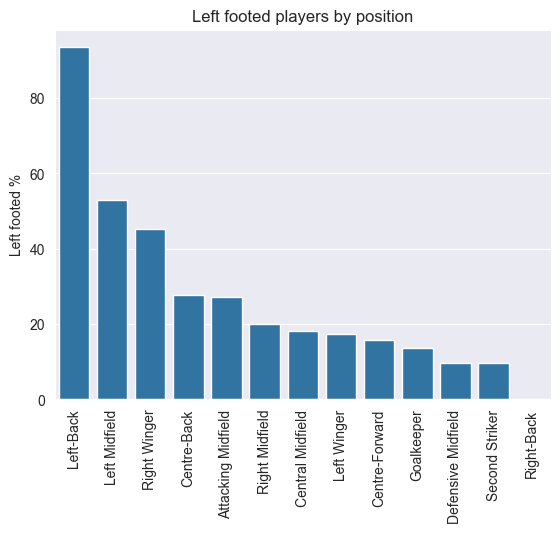

In [73]:
# distribuzione dei giocatori mancini nelle diverse posizioni

left_footed_players = current_players.query('foot == "left"')

total_players_by_position = current_players.groupby('sub_position').size()
left_footed_players_by_position = left_footed_players.groupby('sub_position').size()

left_percentage = ((left_footed_players_by_position / total_players_by_position)*100).fillna(0).round(decimals=2)

left_foot_df = (pd.DataFrame({'sub_position': left_percentage.index, 'left_percentage': left_percentage.values}).
                sort_values(by='left_percentage', ascending=False))

sns.barplot(data=left_foot_df, x='sub_position', y='left_percentage')   
plt.xticks(rotation=90)
plt.title("Left footed players by position")
plt.xlabel("")
plt.ylabel("Left footed %")
plt.show()